# Hackathon - Building a Movie Recommendation System

### Assume that you started working with Netfiz as a Junior Data Scientist. For your company, providing better movie recommendations is at its core and, helps improve better user experience and generate more revenue. 

Understand that:

- Recommender systems make movie-watching a personalized adventure, delighting users with tailored suggestions based on their tastes.
- By predicting user preferences, these systems keep users engaged, driving increased interaction with your platform.
- A robust movie recommender system translates to business success. Satisfied users are loyal users, contributing to increased user retention and revenue.
Imagine the excitement of helping users discover their next favorite movie! Later during the internship program, we will ask you to create a cutting-edge movie recommendation system based on a treasure trove of user ratings. 

For now, your first task at Netfiz is to crunch the data given and answer all the questions asked below.



- About Dataset: Dive into a dataset brimming with 100,836 ratings across 9,742 movies, generated by 610 users over the years. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018. Each user is represented by an id, and no other information is provided about the user. The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv`and `tags.csv`.

- Click here to download the dataset.
Following is a series of MCQ and subjective questions that you have to answer.?

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
movie = pd.read_csv(r"C:\Users\lakka\Downloads\movie_data\movies.csv")
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [32]:
movie.shape

(9742, 3)

In [5]:
ratings = pd.read_csv(r"C:\Users\lakka\Downloads\movie_data\ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [33]:
ratings.shape

(100836, 4)

## How many unique "userId" are available in "ratings.csv"?


In [7]:
ratings['userId'].nunique()

610

In [8]:
# Get the number of unique userId values
unique_user_ids = ratings['userId'].nunique()

# Print the result
print("Number of unique userIds:", unique_user_ids)

Number of unique userIds: 610


## merged

In [11]:
# Merge the 'movies' and 'ratings' DataFrames on the 'movieId' column
merged_data = pd.merge(ratings, movies, on='movieId', how='inner')

# Display the merged DataFrame
print(merged_data)

        userId  movieId  rating   timestamp                             title  \
0            1        1     4.0   964982703                  Toy Story (1995)   
1            5        1     4.0   847434962                  Toy Story (1995)   
2            7        1     4.5  1106635946                  Toy Story (1995)   
3           15        1     2.5  1510577970                  Toy Story (1995)   
4           17        1     4.5  1305696483                  Toy Story (1995)   
...        ...      ...     ...         ...                               ...   
100831     610   160341     2.5  1479545749                  Bloodmoon (1997)   
100832     610   160527     4.5  1479544998  Sympathy for the Underdog (1971)   
100833     610   160836     3.0  1493844794                     Hazard (2005)   
100834     610   163937     3.5  1493848789                Blair Witch (2016)   
100835     610   163981     3.5  1493850155                         31 (2016)   

                           

In [12]:
merged_data

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


### Which movie has recieved maximum number of user ratings?

In [13]:
# Group by movie title and calculate the count of ratings for each movie
ratings_count = merged_data.groupby('title')['rating'].count().reset_index()

# Find the movie with the maximum number of ratings
max_ratings_movie = ratings_count[ratings_count['rating'] == ratings_count['rating'].max()]

# Display the result (movie with the maximum number of ratings)
print("Movie with the maximum number of ratings:")
print(max_ratings_movie)


Movie with the maximum number of ratings:
                    title  rating
3158  Forrest Gump (1994)     329


## Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [35]:
tags = pd.read_csv(r"C:\Users\lakka\Downloads\movie_data\tags.csv")
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


## merged three datasets

In [36]:
# Merge 'movie' and 'ratings' DataFrames on 'movieId'
merged_data = pd.merge(movie, ratings, on='movieId', how='inner')

# Merge the result with 'tags' DataFrame on 'movieId'
merged_data_with_tags = pd.merge(merged_data, tags, on='movieId', how='inner')

In [37]:
merged_data_with_tags

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


In [14]:
# Filter for "Matrix, The (1999)"
matrix_tags = merged_data_with_tags[merged_data_with_tags['title'] == 'Matrix, The (1999)']['tag']

# Display the result (tags for "Matrix, The (1999)")
print(matrix_tags)


142140          martial arts
142141                sci-fi
142142    alternate universe
142143            philosophy
142144      post apocalyptic
                 ...        
143525          martial arts
143526                sci-fi
143527    alternate universe
143528            philosophy
143529      post apocalyptic
Name: tag, Length: 1390, dtype: object


In [38]:
matrix_tags

815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object

## What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [15]:
# Filter the merged DataFrame for the movie "Terminator 2: Judgment Day (1991)"
terminator_ratings = merged_data[merged_data['title'] == 'Terminator 2: Judgment Day (1991)']['rating']

# Calculate the average user rating
average_rating = terminator_ratings.mean()

# Display the result
print("Average user rating for Terminator 2: Judgment Day (1991):", average_rating)


Average user rating for Terminator 2: Judgment Day (1991): 3.970982142857143


## How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?


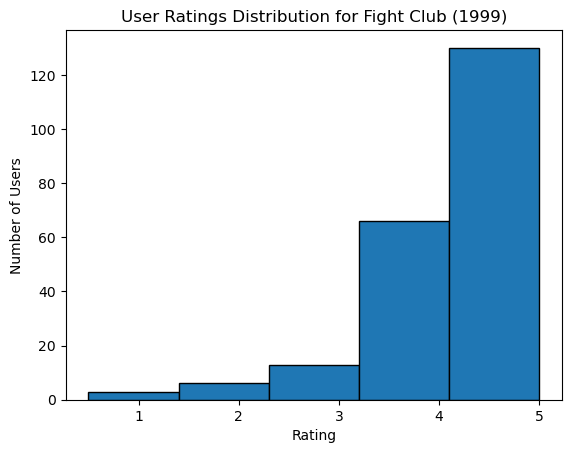

In [16]:
import matplotlib.pyplot as plt

# Filter the data for the "Fight Club (1999)" movie
fight_club_ratings = merged_data[merged_data['title'] == 'Fight Club (1999)']['rating']

# Plot a histogram to visualize the distribution
plt.hist(fight_club_ratings, bins=5, edgecolor='black')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()


### 🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

## Which movie is the most popular based on  average user ratings?
*
Answer this question only after applying the above mentioned "Mandatory Operration".
5 points
- Godfather, The (1972)
- Shawshank Redemption, The (1994)
- Jumanji (1995)
- Wolf of Wall Street, The (2013)

In [18]:
# Step 1: Group user ratings based on movieId and apply aggregation operations
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

# Rename the columns for clarity
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# Step 2: Apply inner join on dataframes created from movies.csv and the grouped df from step 1
merged_data = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter only those movies with more than 50 user ratings
filtered_data = merged_data[merged_data['rating_count'] > 50]

# Identify the most popular movie based on average user ratings
most_popular_movie = filtered_data[filtered_data['rating_mean'] == filtered_data['rating_mean'].max()]['title'].iloc[0]

# Display the result
print("Most popular movie based on average user ratings:", most_popular_movie)


Most popular movie based on average user ratings: Shawshank Redemption, The (1994)


## Select all the correct options which comes under top 5 popular movies based on number of user ratings.
*
Answer this question only after applying the above mentioned "Mandatory Operration".
5 points
- Pulp Fiction (1994)
- Bad Boys (1995)
- Silence of the Lambs, The (1991)
- Matrix, The (1999)

In [19]:
# Step 1: Group user ratings based on movieId and apply aggregation operations
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# Step 2: Inner join on dataframe created from movies.csv and the grouped df from step 1
merged_data = pd.merge(movie, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter only those movies which have more than 50 user ratings
filtered_movies = merged_data[merged_data['rating_count'] > 50]

# Step 4: Select the top 5 popular movies based on the number of user ratings
top_movies = filtered_movies.nlargest(5, 'rating_count')

# Display the top 5 popular movies
print(top_movies[['title', 'rating_count']])


                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


## Which Sci-Fi movie is "third most popular" based on the number of user ratings?
*
Answer this question only after applying the above mentioned "Mandatory Operration".
5 points
- Deadpool (2016)
- Terminator 2: Judgment Day (1991)
- X-Men: The Last Stand (2006)
- Jurassic Park (1993)

In [21]:
# Group the user ratings based on movieId and apply aggregation operations
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

# Rename columns for clarity
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# Apply inner join on dataframes created from movies.csv and the grouped df from step 1
merged_data = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

# Filter only those movies which have more than 50 user ratings
filtered_data = merged_data[merged_data['rating_count'] > 50]

# Sort the filtered data based on rating_count in descending order
sorted_data = filtered_data.sort_values(by='rating_count', ascending=False)

# Extract the Sci-Fi movie with the third most user ratings
third_most_popular_scifi_movie = sorted_data[sorted_data['genres'].str.contains('Sci-Fi')].iloc[2]['title']

# Print the result
print("Third most popular Sci-Fi movie based on user ratings:", third_most_popular_scifi_movie)


Third most popular Sci-Fi movie based on user ratings: Jurassic Park (1993)


### 🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

If you are unable to write the webscraping script yourself, you can request the same by commenting ## LinkedIn Post.


## Mention the movieId of the movie which has the highest IMDB rating.?

In [25]:
# Find the movie with the highest IMDB rating
highest_rated_movie = merged_data.loc[merged_data['rating'] == merged_data['rating'].max()]

# Extract the movieId of the highest-rated movie
movie_id_highest_rated = highest_rated_movie['movieId'].iloc[0]

# Print the result
print("MovieId of the movie with the highest IMDB rating:", movie_id_highest_rated)


MovieId of the movie with the highest IMDB rating: 1


In [41]:
highest_rated_movie

movieId                                                1
title                                   Toy Story (1995)
genres       Adventure|Animation|Children|Comedy|Fantasy
userId                                                31
rating                                               5.0
timestamp                                      850466616
Name: 9, dtype: object

In [42]:
movie_id_highest_rated

1

## Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [24]:
# Filter the merged DataFrame to include only "Sci-Fi" movies
sci_fi_movies = merged_data[merged_data['genres'].str.contains('Sci-Fi')]

# Find the movie with the highest IMDB rating in the filtered DataFrame
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['rating'].idxmax()]

# Print the movieId of the highest-rated Sci-Fi movie
print("MovieId of the highest-rated Sci-Fi movie:", highest_rated_sci_fi_movie['movieId'])


MovieId of the highest-rated Sci-Fi movie: 24
